# Load Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("perceptron.csv")

# Plot Data with label

Text(0, 0.5, 'x2')

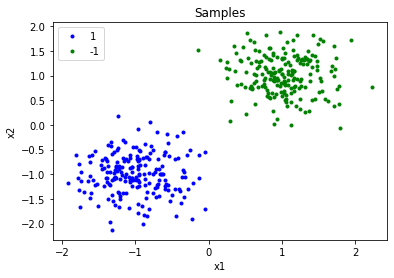

In [2]:
plt.plot(df[df["y"]==1]["x1"],df[df["y"]==1]["x2"],"b.",label ="1")
plt.plot(df[df["y"]==-1]["x1"],df[df["y"]==-1]["x2"],"g.",label ="-1")
plt.legend()
plt.title("Samples")
plt.xlabel("x1")
plt.ylabel("x2")

# Split Data to test and train sets

In [3]:
shuffle_df = df.sample(frac=1)
train_size = int(0.75 * len(df))
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]
print(df.shape)
print(train_set.shape)
print(test_set.shape)

(400, 3)
(300, 3)
(100, 3)


# initialize weights, bias and other variables

In [4]:
w =     [0.0,0.0]
b =     0
h =     0
theta = 0.2
alpha = 0.1
epoch = 10

# train wights on train set

In [5]:
for i in range(epoch):
    for sample in train_set.values:
        x1 = sample[0]
        x2 = sample[1]
        y = sample[2]
        net= (x1*w[0]) + (x2*w[1]) + b
        if abs(net)<theta:h=0
        elif net>theta : h=1
        elif net< (-theta) : h=-1
        if(h!=y):
            w[0] = w[0] + (alpha*x1*y)
            w[1] = w[1] + (alpha*x2*y)
            b = b*y
    flag=0
    for sample in train_set.values:
        x1 = sample[0]
        x2 = sample[1]
        y = sample[2]
        net= (x1*w[0]) + (x2*w[1]) + b     
        if abs(net)<theta:h=0
        elif net>theta : h=1
        elif net<(-theta) : h=-1
        if(h!=y): 
            flag=1
            break
    if(flag == 0):
        print("\n.: algorithm finds best line seprator in ",i+1, "th epoch :.\n")
        break
print("weights: ",w)
print("bias: ",b)


.: algorithm finds best line seprator in 9th epoch :.

weights: [-0.6103530710029563, -0.39222436602438804]
bias: 0.0


# Prediction and Evaluation

Accuracy: 1.0


<AxesSubplot:>

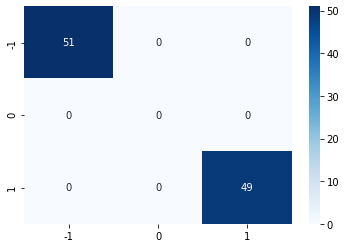

In [6]:
from sklearn.metrics import confusion_matrix
y_pred=[]
err = 0
for sample in test_set.values:
    x1 = sample[0]
    x2 = sample[1]
    y = sample[2]
    net= (x1*w[0]) + (x2*w[1]) + b
    if abs(net)<theta:h=0
    elif net>theta : h=1
    elif net<(-theta) : h=-1
    y_pred.append(h)
    if(h==y):err+=1
print("Accuracy: ",err/len(test_set.values))
sns.heatmap(confusion_matrix(test_set.y, y_pred,labels=[-1.0, 0, 1.0]),cmap="Blues", annot=True,xticklabels=["-1","0","1"],yticklabels=["-1","0","1"])

# Ploting

<ipython-input-9-2af9fcd27caa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["y_pred"] = y_pred


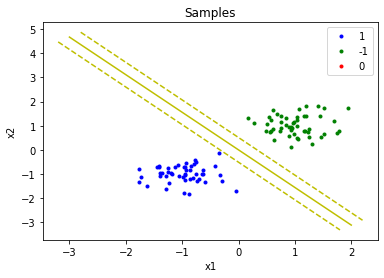

In [9]:
x = np.arange(-3, 3)
y =((w[0]*x)+b)/(-w[1])
test_set["y_pred"] = y_pred
plt.plot(test_set[test_set["y_pred"]==1]["x1"],test_set[test_set["y_pred"]==1]["x2"],"b.",label ="1")
plt.plot(test_set[test_set["y_pred"]==-1]["x1"],test_set[test_set["y_pred"]==-1]["x2"],"g.",label ="-1")
plt.plot(test_set[test_set["y_pred"]==0]["x1"],test_set[test_set["y_pred"]==0]["x2"],"r.",label ="0")
plt.legend()
plt.title("Samples")
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(x, y, "y-")
plt.plot(x+theta2, y+theta, "y--")
plt.plot(x-theta2, y-theta, "y--")